In [14]:
import pandas as pd
import time
import math

In [45]:
import osmnx as ox
import networkx as nx

from geopy import distance
from geopy.geocoders import Nominatim

In [ ]:
%matplotlib inline

In [28]:
df = pd.read_csv('./../data/cleaned_bar_and_pubs.csv')

In [29]:
df.head()

,bar_pub_name,borough,building,address,zip,phone,latitude,longitude
0,1893 SPORTS BAR,Bronx,1,EAST 161 STREET,10451.0,9172843260,40.829028,-73.928496
1,224 SPORTS BAR,Bronx,1877,WEBSTER AVENUE,10457.0,9293926963,40.847233,-73.901220
2,27 SPORTS BAR & CAFE,Bronx,2,WEST MOUNT EDEN AVENUE,10452.0,7187313585,40.844398,-73.914915
3,619 BAR & RESTAURANT EL SALVADORENO,Bronx,395,EAST 151 STREET,10455.0,6466378179,40.817614,-73.917500
4,ANTOJITOS JUICE BAR,Bronx,3748,THIRD AVENUE,10456.0,3472844013,40.836157,-73.902725


In [23]:
len(df)

1315

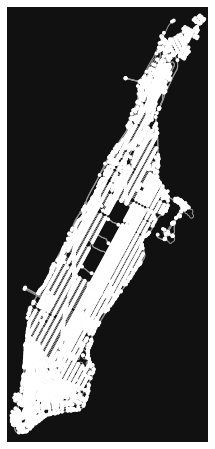

In [27]:
G = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G))

In [34]:
Gp = ox.project_graph(G)

In [66]:
orig = list(Gp)[1]
dest = list(Gp)[121]

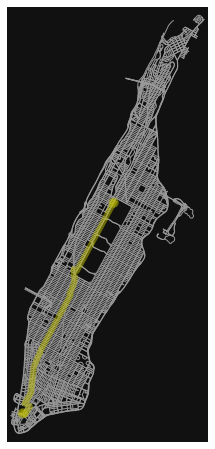

In [67]:
route = ox.shortest_path(Gp, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(Gp, route, route_color="y", route_linewidth=6, node_size=0)

In [40]:
X0 = 40.829028
Y0 = -73.928496

X1 = 40.850923019168
Y1 = -73.89899515

In [75]:
# or, find the nearest node to a single point
node = ox.nearest_nodes(Gp, X0, Y0)
node

607911351

In [70]:

orig_node = ox.distance.nearest_nodes(Gp, X0, Y0)

target_node = ox.distance.nearest_nodes(Gp, X1, Y1)


print("ON:",orig_node)
print("TN:",target_node)
print(nx.shortest_path_length(G=Gp, source=orig_node, target=target_node, weight='length'))

ON: 607911351
TN: 607911351
0


In [47]:
geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.reverse(f"{X0}, {Y0}")
address = location.raw['address']
area = f"{address['city']}, {address['country']}"

print(address)
print("-----------------------------------")
print(area)

{'leisure': 'Yankee Stadium', 'house_number': '1', 'road': 'East 161st Street', 'suburb': 'The Bronx', 'city': 'City of New York', 'state': 'New York', 'ISO3166-2-lvl4': 'US-NY', 'postcode': '10451', 'country': 'United States', 'country_code': 'us'}
-----------------------------------
City of New York, United States


In [48]:
geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.reverse(f"{X1}, {Y1}")
address = location.raw['address']
area = f"{address['city']}, {address['country']}"

print(address)
print("-----------------------------------")
print(area)

{'house_number': '2032', 'road': 'Webster Avenue', 'neighbourhood': 'Tremont', 'suburb': 'The Bronx', 'city': 'City of New York', 'state': 'New York', 'ISO3166-2-lvl4': 'US-NY', 'postcode': '10457', 'country': 'United States', 'country_code': 'us'}
-----------------------------------
City of New York, United States
